# Holidays

In [1]:
library(smacof)
library(ggpubr)

# The other examples using data from pile sorting
holidays <- read.csv2("../data/holidays.csv", row.names = 1)
head(holidays)

Loading required package: plotrix

Loading required package: colorspace

Loading required package: e1071


Attaching package: ‘smacof’


The following object is masked from ‘package:base’:

    transform


Loading required package: ggplot2



,April_Fools,Christmas,Columbus,Easter,Fathers,Flag,X4th_Of_July,Groundhog,Halloween,Hanukkah,⋯,New_Years,Passover,Presidents,St_Patrick,St_Valentines,Thanksgiving,Veterans,Yom_Kippur,Patriots,Secretaries
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
April_Fools,1.00,0.00,0.19,0.15,0.22,0.41,0.11,0.67,0.26,0.00,⋯,0.11,0.11,0.19,0.33,0.19,0.00,0.19,0.04,0.33,0.56
Christmas,0.00,1.00,0.00,0.74,0.11,0.04,0.11,0.11,0.30,0.70,⋯,0.37,0.48,0.11,0.19,0.33,0.37,0.00,0.44,0.00,0.04
Columbus,0.19,0.00,1.00,0.00,0.22,0.44,0.30,0.19,0.15,0.04,⋯,0.04,0.04,0.63,0.19,0.07,0.26,0.70,0.19,0.56,0.26
Easter,0.15,0.74,0.00,1.00,0.15,0.04,0.15,0.00,0.26,0.52,⋯,0.26,0.63,0.00,0.22,0.22,0.41,0.00,0.48,0.07,0.15
Fathers,0.22,0.11,0.22,0.15,1.00,0.15,0.19,0.19,0.19,0.04,⋯,0.11,0.07,0.19,0.15,0.19,0.11,0.15,0.00,0.15,0.33
Flag,0.41,0.04,0.44,0.04,0.15,1.00,0.37,0.41,0.07,0.04,⋯,0.04,0.04,0.59,0.19,0.07,0.07,0.67,0.04,0.81,0.33


In [2]:
# We need distance measures. The original values are similarities.
holidays_dis <- 1 - holidays
head(holidays_dis)

,April_Fools,Christmas,Columbus,Easter,Fathers,Flag,X4th_Of_July,Groundhog,Halloween,Hanukkah,⋯,New_Years,Passover,Presidents,St_Patrick,St_Valentines,Thanksgiving,Veterans,Yom_Kippur,Patriots,Secretaries
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
April_Fools,0.00,1.00,0.81,0.85,0.78,0.59,0.89,0.33,0.74,1.00,⋯,0.89,0.89,0.81,0.67,0.81,1.00,0.81,0.96,0.67,0.44
Christmas,1.00,0.00,1.00,0.26,0.89,0.96,0.89,0.89,0.70,0.30,⋯,0.63,0.52,0.89,0.81,0.67,0.63,1.00,0.56,1.00,0.96
Columbus,0.81,1.00,0.00,1.00,0.78,0.56,0.70,0.81,0.85,0.96,⋯,0.96,0.96,0.37,0.81,0.93,0.74,0.30,0.81,0.44,0.74
Easter,0.85,0.26,1.00,0.00,0.85,0.96,0.85,1.00,0.74,0.48,⋯,0.74,0.37,1.00,0.78,0.78,0.59,1.00,0.52,0.93,0.85
Fathers,0.78,0.89,0.78,0.85,0.00,0.85,0.81,0.81,0.81,0.96,⋯,0.89,0.93,0.81,0.85,0.81,0.89,0.85,1.00,0.85,0.67
Flag,0.59,0.96,0.56,0.96,0.85,0.00,0.63,0.59,0.93,0.96,⋯,0.96,0.96,0.41,0.81,0.93,0.93,0.33,0.96,0.19,0.67


In [3]:
# Apply metric mds
mds <- smacofSym(holidays_dis, type = "ratio")
mds$stress

[1] 0.2428592

In [4]:
configuration <- as.data.frame(mds$conf)
configuration <- -configuration
head(configuration)

,D1,D2
,<dbl>,<dbl>
April_Fools,0.309373883,-0.5094652
Christmas,-0.749686371,0.0710064
Columbus,0.401662449,0.1430501
Easter,-0.662487474,0.1456119
Fathers,-0.009575296,-0.7587676
Flag,0.665830456,0.1847226


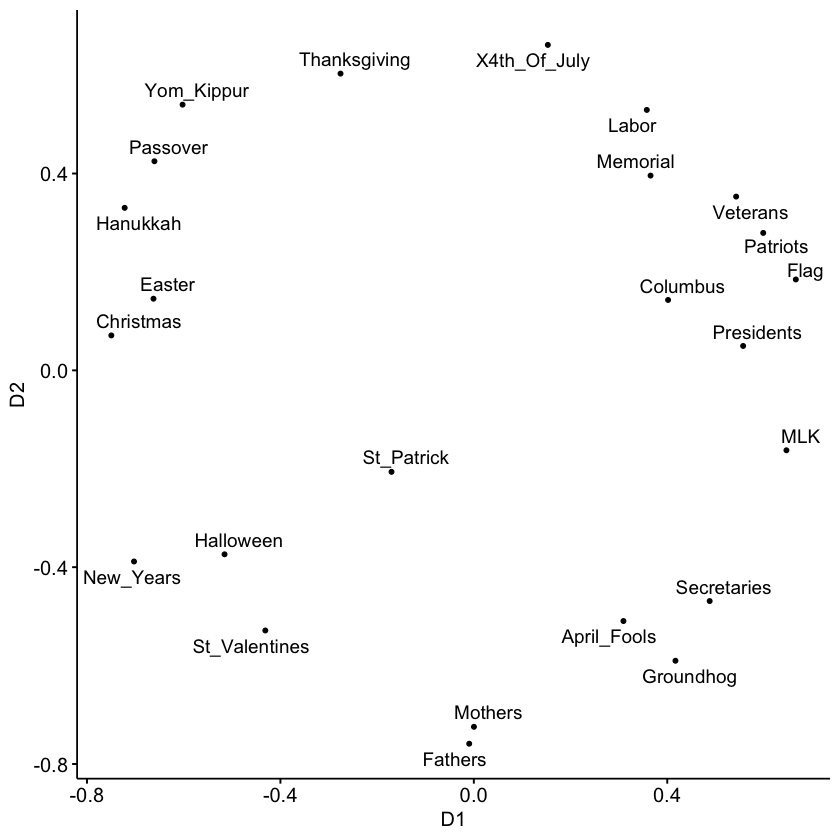

In [5]:
ggscatter(configuration, x = "D1", y = "D2", 
          label = colnames(holidays),
          size = 1,
          repel = TRUE)

In [6]:
# Apply nonmetric mds
mds_ord <- smacofSym(holidays_dis, type = "ordinal")
mds_ord$stress

[1] 0.1463946

In [7]:
configuration_ord <- as.data.frame(mds_ord$conf)
configuration_ord <- -configuration_ord

In [8]:
head(configuration_ord)

,D1,D2
,<dbl>,<dbl>
April_Fools,0.3436709,-0.4525871
Christmas,-0.8050107,0.1431924
Columbus,0.4814456,0.1566296
Easter,-0.7475485,0.1536023
Fathers,0.1160153,-0.8192149
Flag,0.6554244,0.1608620


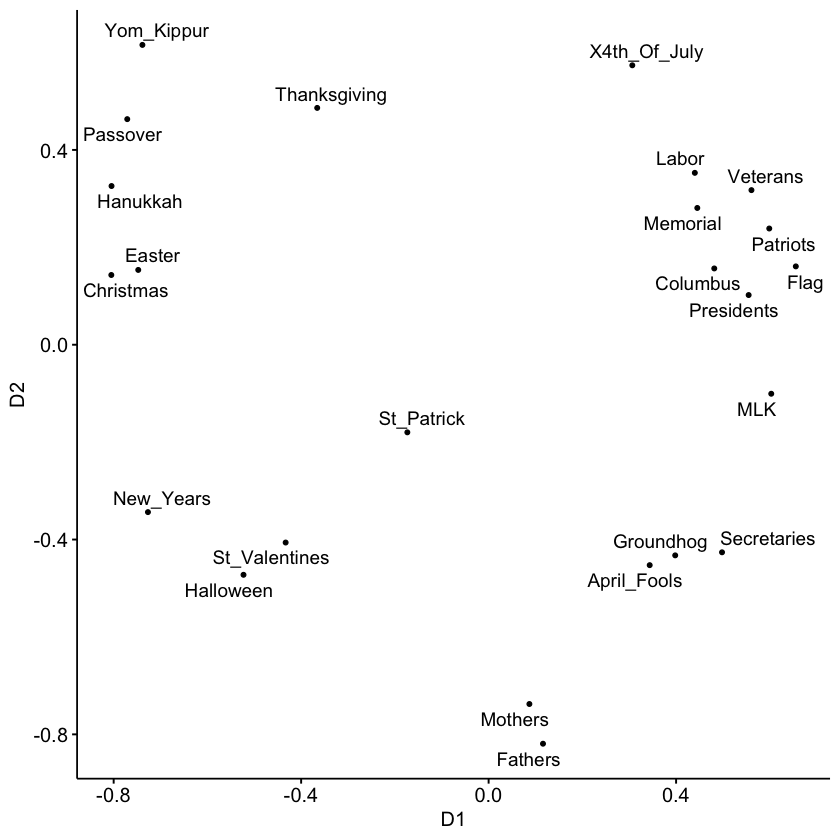

In [9]:
ggscatter(configuration_ord, x = "D1", y = "D2", 
          label = colnames(holidays),
          size = 1,
          repel = TRUE)

In [10]:
# Original data with isolates. 28 holidays of which 4 were never included in pile sorts
holidays_iso <- read.csv2("../data/holidays_iso.csv", row.names = 1)
holidays_iso

,April_Fools,Christmas,Columbus,Easter,Fathers,Flag,X4th_Of_July,Groundhog,Halloween,Hanukkah,⋯,Ramadan,Rosh_Hashanah,St_Patrick,St_Valentines,Thanksgiving,Veterans,Yom_Kippur,Patriots,Cinco_de_Mayo,Secretaries
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
April_Fools,1.00,0.00,0.19,0.15,0.22,0.41,0.11,0.67,0.26,0.00,⋯,0,0,0.33,0.19,0.00,0.19,0.04,0.33,0,0.56
Christmas,0.00,1.00,0.00,0.74,0.11,0.04,0.11,0.11,0.30,0.70,⋯,0,0,0.19,0.33,0.37,0.00,0.44,0.00,0,0.04
Columbus,0.19,0.00,1.00,0.00,0.22,0.44,0.30,0.19,0.15,0.04,⋯,0,0,0.19,0.07,0.26,0.70,0.19,0.56,0,0.26
Easter,0.15,0.74,0.00,1.00,0.15,0.04,0.15,0.00,0.26,0.52,⋯,0,0,0.22,0.22,0.41,0.00,0.48,0.07,0,0.15
Fathers,0.22,0.11,0.22,0.15,1.00,0.15,0.19,0.19,0.19,0.04,⋯,0,0,0.15,0.19,0.11,0.15,0.00,0.15,0,0.33
Flag,0.41,0.04,0.44,0.04,0.15,1.00,0.37,0.41,0.07,0.04,⋯,0,0,0.19,0.07,0.07,0.67,0.04,0.81,0,0.33
4th_Of_July,0.11,0.11,0.30,0.15,0.19,0.37,1.00,0.04,0.15,0.07,⋯,0,0,0.26,0.19,0.26,0.41,0.07,0.41,0,0.04
Groundhog,0.67,0.11,0.19,0.00,0.19,0.41,0.04,1.00,0.19,0.11,⋯,0,0,0.26,0.30,0.00,0.19,0.04,0.26,0,0.52
Halloween,0.26,0.30,0.15,0.26,0.19,0.07,0.15,0.19,1.00,0.15,⋯,0,0,0.26,0.48,0.48,0.15,0.19,0.07,0,0.15


In [11]:
holidays_iso_dis <- 1 - holidays_iso

In [12]:
mds_iso <- smacofSym(holidays_iso_dis, type = "ratio")
mds_iso$stress

[1] 0.298177

In [13]:
configuration_iso <- as.data.frame(mds_iso$conf)
configuration_iso <- -configuration_iso

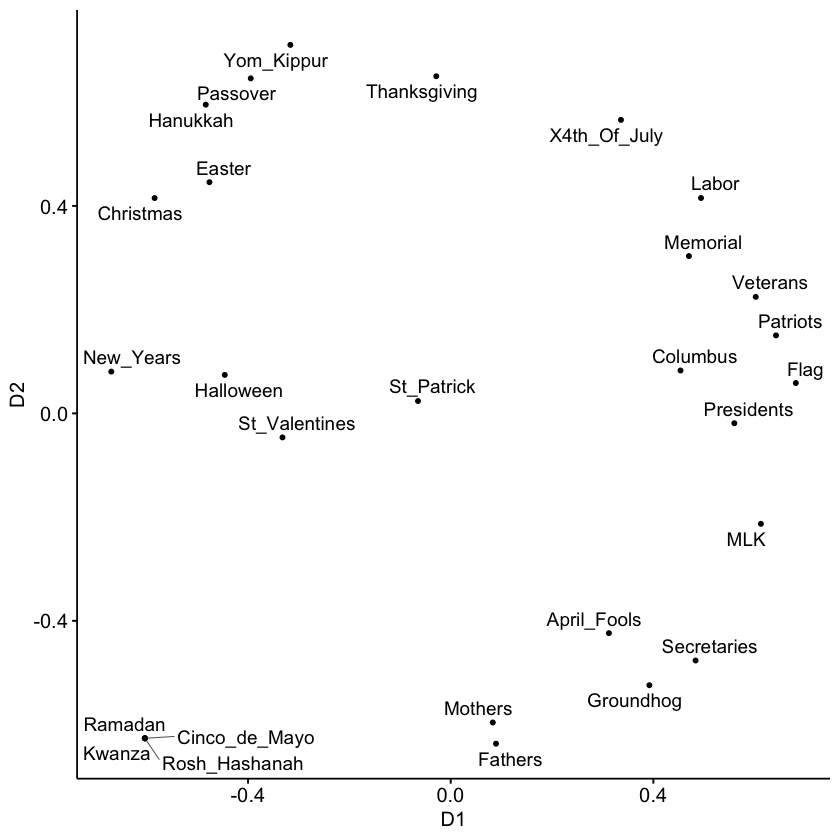

In [14]:
ggscatter(configuration_iso, x = "D1", y = "D2", 
          label = colnames(holidays_iso),
          size = 1,
          repel = TRUE)